In [1]:
import requests
import pandas as pd

In [2]:

channel = 1693300
api_key = '7GA8O6N1WIPHQW4R'
n_request = 83

url = f'https://api.thingspeak.com/channels/{channel}/feeds.json?api_key={api_key}&results={n_request}'

url



'https://api.thingspeak.com/channels/1693300/feeds.json?api_key=7GA8O6N1WIPHQW4R&results=83'

In [3]:
data_payload = requests.get(url).json()
feed_data = data_payload["feeds"]
feed_data

[{'created_at': '2023-05-17T05:04:01Z',
  'entry_id': 1,
  'field1': '-684',
  'field2': '280',
  'field3': '15628}',
  'field4': None,
  'field5': None,
  'field6': None,
  'field7': None},
 {'created_at': '2023-05-17T05:04:17Z',
  'entry_id': 2,
  'field1': '-664',
  'field2': '264',
  'field3': '15408}',
  'field4': None,
  'field5': None,
  'field6': None,
  'field7': None},
 {'created_at': '2023-05-17T05:04:32Z',
  'entry_id': 3,
  'field1': '-692',
  'field2': '336',
  'field3': '15560}',
  'field4': None,
  'field5': None,
  'field6': None,
  'field7': None},
 {'created_at': '2023-05-17T05:04:48Z',
  'entry_id': 4,
  'field1': '-704',
  'field2': '404',
  'field3': '15524}',
  'field4': None,
  'field5': None,
  'field6': None,
  'field7': None},
 {'created_at': '2023-05-17T05:05:04Z',
  'entry_id': 5,
  'field1': '-740',
  'field2': '380',
  'field3': '15592}',
  'field4': None,
  'field5': None,
  'field6': None,
  'field7': None},
 {'created_at': '2023-05-17T05:05:19Z',
  'en

In [5]:
len(feed_data)
if len(feed_data) == n_request:
    print("data imported with sucess")

data imported with sucess


In [6]:
col_tks = ['created_at', 'entry_id', 'field1', 'field2', 'field3']

In [21]:
df_feed = pd.DataFrame(data=feed_data, columns=col_tks)
df_feed.head()

,created_at,entry_id,field1,field2,field3
0,2023-05-17T05:04:01Z,1,-684,280,15628}
1,2023-05-17T05:04:17Z,2,-664,264,15408}
2,2023-05-17T05:04:32Z,3,-692,336,15560}
3,2023-05-17T05:04:48Z,4,-704,404,15524}
4,2023-05-17T05:05:04Z,5,-740,380,15592}


In [22]:
df_feed['field3'] = df_feed['field3'].astype(str)
df_feed['field3'] = df_feed['field3'].apply(lambda x: x.replace("}",""))

df_feed['field1'] = df_feed['field1'].astype(float)
df_feed['field2'] = df_feed['field2'].astype(float)
df_feed['field3'] = df_feed['field3'].astype(float)

df_feed

,created_at,entry_id,field1,field2,field3
0,2023-05-17T05:04:01Z,1,-684.0,280.0,15628.0
1,2023-05-17T05:04:17Z,2,-664.0,264.0,15408.0
2,2023-05-17T05:04:32Z,3,-692.0,336.0,15560.0
3,2023-05-17T05:04:48Z,4,-704.0,404.0,15524.0
4,2023-05-17T05:05:04Z,5,-740.0,380.0,15592.0
...,...,...,...,...,...
78,2023-05-17T05:24:28Z,79,-556.0,520.0,15456.0
79,2023-05-17T05:24:44Z,80,-612.0,632.0,15484.0
80,2023-05-17T05:25:00Z,81,-620.0,596.0,15568.0
81,2023-05-17T05:25:15Z,82,-932.0,636.0,15668.0


In [26]:
mediax = df_feed['field1'].mean()
stdx = df_feed['field1'].std()


In [27]:
df_feed ['meanX']  = mediax
df_feed ['stdX']  = stdx
df_feed

,created_at,entry_id,field1,field2,field3,meanX,stdX
0,2023-05-17T05:04:01Z,1,-684.0,280.0,15628.0,-603.13253,305.686623
1,2023-05-17T05:04:17Z,2,-664.0,264.0,15408.0,-603.13253,305.686623
2,2023-05-17T05:04:32Z,3,-692.0,336.0,15560.0,-603.13253,305.686623
3,2023-05-17T05:04:48Z,4,-704.0,404.0,15524.0,-603.13253,305.686623
4,2023-05-17T05:05:04Z,5,-740.0,380.0,15592.0,-603.13253,305.686623
...,...,...,...,...,...,...,...
78,2023-05-17T05:24:28Z,79,-556.0,520.0,15456.0,-603.13253,305.686623
79,2023-05-17T05:24:44Z,80,-612.0,632.0,15484.0,-603.13253,305.686623
80,2023-05-17T05:25:00Z,81,-620.0,596.0,15568.0,-603.13253,305.686623
81,2023-05-17T05:25:15Z,82,-932.0,636.0,15668.0,-603.13253,305.686623


In [28]:
limsX = mediax + stdx
limiX = mediax - stdx

In [29]:
df_feed ['limsX']  = limsX
df_feed ['limiX']  = limiX
df_feed

,created_at,entry_id,field1,field2,field3,meanX,stdX,limsX,limiX
0,2023-05-17T05:04:01Z,1,-684.0,280.0,15628.0,-603.13253,305.686623,-297.445907,-908.819153
1,2023-05-17T05:04:17Z,2,-664.0,264.0,15408.0,-603.13253,305.686623,-297.445907,-908.819153
2,2023-05-17T05:04:32Z,3,-692.0,336.0,15560.0,-603.13253,305.686623,-297.445907,-908.819153
3,2023-05-17T05:04:48Z,4,-704.0,404.0,15524.0,-603.13253,305.686623,-297.445907,-908.819153
4,2023-05-17T05:05:04Z,5,-740.0,380.0,15592.0,-603.13253,305.686623,-297.445907,-908.819153
...,...,...,...,...,...,...,...,...,...
78,2023-05-17T05:24:28Z,79,-556.0,520.0,15456.0,-603.13253,305.686623,-297.445907,-908.819153
79,2023-05-17T05:24:44Z,80,-612.0,632.0,15484.0,-603.13253,305.686623,-297.445907,-908.819153
80,2023-05-17T05:25:00Z,81,-620.0,596.0,15568.0,-603.13253,305.686623,-297.445907,-908.819153
81,2023-05-17T05:25:15Z,82,-932.0,636.0,15668.0,-603.13253,305.686623,-297.445907,-908.819153


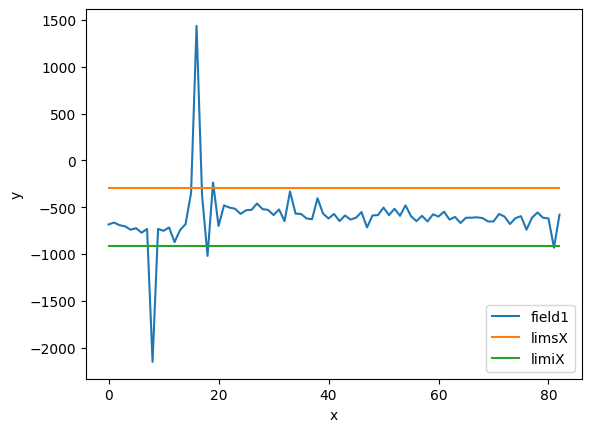

In [33]:
import matplotlib.pyplot as plt

df_lim = df_feed[['field1', 'limsX', 'limiX']]

df_lim.plot()

plt.legend(loc='lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [19]:
host = 'https://api.thingspeak.com/update.json'

In [20]:
data = {
    "api_key": "4YQSYIDJPSCMDZDM",
    "field1": 23
}

In [21]:
response = requests.post(host, data=data)
response.status_code
response.json()

{'channel_id': 1683998,
 'created_at': '2023-03-30T23:36:34Z',
 'entry_id': 1495,
 'field1': '23',
 'field2': None,
 'field3': None,
 'field4': None,
 'field5': None,
 'field6': None,
 'field7': None,
 'field8': None,
 'latitude': None,
 'longitude': None,
 'elevation': None,
 'status': None}

In [22]:
def send_data(host:str, data:dict):
    status = None
    response = requests.post(host, data=data)
    response.status_code
    response.json()

    if response != None:
        status = 'ok'
        
    return status

In [26]:
from time import sleep
data = {}
for i in range(0,10):
    data['api_key'] =  "4YQSYIDJPSCMDZDM"
    data['field1'] = i*1020
    send_data(host=host,data=data )
    sleep(10)
    print(f'request {i} foi enviado com sucesso')

request 0 foi enviado com sucesso
request 1 foi enviado com sucesso
request 2 foi enviado com sucesso
request 3 foi enviado com sucesso
request 4 foi enviado com sucesso
request 5 foi enviado com sucesso
request 6 foi enviado com sucesso
request 7 foi enviado com sucesso
request 8 foi enviado com sucesso
request 9 foi enviado com sucesso
